In [180]:

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

!pip install pandas_profiling
import pandas_profiling

%config InlineBackend.figure_format = 'svg' 
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.float_format = '{:.2f}'.format


# Подбор признаков

# Данные титаника:

https://www.kaggle.com/c/titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.



## Data Dictionary

Variable	Definition	Key  
survival	Survival	0 = No, 1 = Yes  
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
sex	Sex	  
Age	Age in years	  
sibsp	# of siblings / spouses aboard the Titanic	  
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
Variable Notes  

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...   
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**train.csv** - training set - тренировочный набор данных. В них известен ответ - survival - бинарный признак 0 (не выжил)/1 (выжил)  
**test.csv** - test set - тестовый набор данных. Ответ не известен. На них проверяется качество построенной модели.  


## Алгоритм работы:  

* изучаем и преобразуем данные из train.csv
* фиксируем метод преобразований 
* применяем те же самые преобразования на test.csv  


In [4]:
!head train.csv

In [2]:
!head test.csv

In [182]:
df_train = pd.read_csv('train.csv', na_values='NaN')
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                             Heikkinen, Miss. Laina  female 26.00      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                           Allen, Mr. William Henry    male 35.00      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  7.25   NaN        S  
1      0          PC 17599 71.28   C85        C  
2      0  STON/O2. 3101282  7.92   NaN        S  
3      0            113803 53.10  C123        S  
4      0            373450  8.05   NaN        S

In [183]:
df_train.Age.describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

In [184]:
df_train.shape

(891, 12)

In [11]:
df_test = pd.read_csv('test.csv', na_values='NaN')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
0 34.50      0      0   330911  7.83   NaN        Q  
1 47.00      1      0   363272  7.00   NaN        S  
2 62.00      0      0   240276  9.69   NaN        Q  
3 27.00      0      0   315154  8.66   NaN        S  
4 22.00      1      1  3101298 12.29   NaN        S

In [174]:
pandas_profiling.ProfileReport(df_train)

In [12]:
# move target to the right
survived = df_train['Survived']
df_train.drop(labels=['Survived'], axis=1, inplace=True)
df_train['Survived'] = survived
df_train.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket  Fare Cabin Embarked  Survived  
0    male 22.00      1      0         A/5 21171  7.25   NaN        S         0  
1  female 38.00      1      0          PC 17599 71.28   C85        C         1  
2  female 26.00      0      0  STON/O2. 3101282  7.92   NaN        S         1  
3  female 35.00      1      0            113803 53.10  C123        S         1  
4    male 35.00      0      0            373450  8.05   NaN        S         0

In [9]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
0 34.50      0      0   330911  7.83   NaN        Q  
1 47.00      1      0   363272  7.00   NaN        S  
2 62.00      0      0   240276  9.69   NaN        Q  
3 27.00      0      0   315154  8.66   NaN        S  
4 22.00      1      1  3101298 12.29   NaN        S

# Отсутствующие значения

### Стратегии

* Удалить признак
* Удалить строки с отсутствующими значениями
* Заменить отсутствующие значения на что-либо (медиана, среднее, 0, ...)

## Можно было бы сделать так: 

In [186]:
# df_train.dropna(subset=["Age"]) # option 1

# df_train.drop("Age", axis=1) # option 2

median = df_train["Age"].median()
df_train["Age"].fillna(median) # option 3

0     22.00
1     38.00
2     26.00
3     35.00
4     35.00
       ... 
886   27.00
887   19.00
888   28.00
889   26.00
890   32.00
Name: Age, Length: 891, dtype: float64

In [188]:
df_train["Age"].mean()

29.69911764705882

In [189]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
imputer.fit(df_train[['Age']])

SimpleImputer(strategy='median')

In [190]:
imputer.statistics_

array([28.])

In [192]:
imputer.transform(df_test[['Age']])

array([[34.5 ],
       [47.  ],
       [62.  ],
       [27.  ],
       [22.  ],
       [14.  ],
       [30.  ],
       [26.  ],
       [18.  ],
       [21.  ],
       [28.  ],
       [46.  ],
       [23.  ],
       [63.  ],
       [47.  ],
       [24.  ],
       [35.  ],
       [21.  ],
       [27.  ],
       [45.  ],
       [55.  ],
       [ 9.  ],
       [28.  ],
       [21.  ],
       [48.  ],
       [50.  ],
       [22.  ],
       [22.5 ],
       [41.  ],
       [28.  ],
       [50.  ],
       [24.  ],
       [33.  ],
       [28.  ],
       [30.  ],
       [18.5 ],
       [28.  ],
       [21.  ],
       [25.  ],
       [28.  ],
       [39.  ],
       [28.  ],
       [41.  ],
       [30.  ],
       [45.  ],
       [25.  ],
       [45.  ],
       [28.  ],
       [60.  ],
       [36.  ],
       [24.  ],
       [27.  ],
       [20.  ],
       [28.  ],
       [28.  ],
       [10.  ],
       [35.  ],
       [25.  ],
       [28.  ],
       [36.  ],
       [17.  ],
       [32.  ],
       [

In [175]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer 

def get_num_cols(df):
    return df[['Age', 'Fare']]

pipeline = make_union(*[
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='median')),
])

In [14]:
pipeline.fit_transform(df_train)[0:100]

array([[ 22.        ,   7.25      ],
       [ 38.        ,  71.2833    ],
       [ 26.        ,   7.925     ],
       [ 35.        ,  53.1       ],
       [ 35.        ,   8.05      ],
       [ 29.69911765,   8.4583    ],
       [ 54.        ,  51.8625    ],
       [  2.        ,  21.075     ],
       [ 27.        ,  11.1333    ],
       [ 14.        ,  30.0708    ],
       [  4.        ,  16.7       ],
       [ 58.        ,  26.55      ],
       [ 20.        ,   8.05      ],
       [ 39.        ,  31.275     ],
       [ 14.        ,   7.8542    ],
       [ 55.        ,  16.        ],
       [  2.        ,  29.125     ],
       [ 29.69911765,  13.        ],
       [ 31.        ,  18.        ],
       [ 29.69911765,   7.225     ],
       [ 35.        ,  26.        ],
       [ 34.        ,  13.        ],
       [ 15.        ,   8.0292    ],
       [ 28.        ,  35.5       ],
       [  8.        ,  21.075     ],
       [ 38.        ,  31.3875    ],
       [ 29.69911765,   7.225     ],
 

# Масштабирование признаков

In [176]:
def get_class_colour(class_label):
    if class_label == 0:
        return 'green'
    if class_label == 1:
        return 'blue'
    return 'red'

def plot_points_scaled(X, y, new_points=None, new_prediction=None, nearest_points=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.xlim(0, 25)
    plt.ylim(0, 4)
    plt.gca().set_aspect('equal')

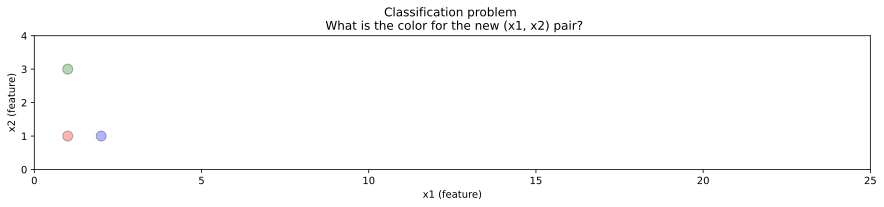

In [177]:
X = np.array([[1, 3], [2, 1], [1, 1]])
y = np.array([0, 1, 2])
plot_points_scaled(X, y)

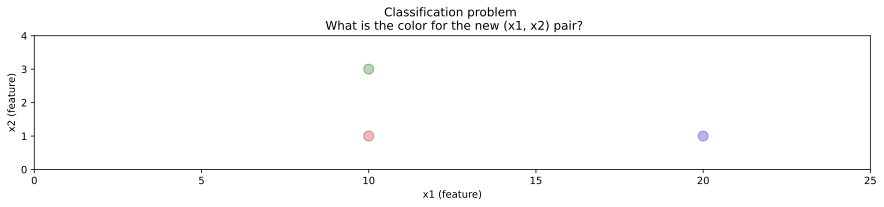

In [178]:
X = np.array([[10, 3], [20, 1], [10, 1]])
y = np.array([0, 1, 2])
plot_points_scaled(X, y)

## Feature scaling
http://benalexkeen.com/feature-scaling-with-scikit-learn/

### MinMaxScaler

Привести к значениям из $[0, 1]$:
$$X = (X - X.min())/(X.max() - X.min())$$



In [15]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer

def get_num_cols(df):
    return df[['Age', 'Fare']]

pipeline = make_union(*[
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), Imputer(strategy='mean'), MinMaxScaler()),
])

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
pipeline.fit_transform(df_train)

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36792055, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

### StandardScaler

Привести к значениям с $mean = 0$ и $std = 1$:
$$X = (X - X.mean())/X.std()$$



In [33]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

def get_num_cols(df):
    return df[['Age', 'Fare']]

pipeline = make_union(*[
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), StandardScaler()),
])

In [34]:
pipeline.fit_transform(df_train)

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

# Комбинации признаков

## Developing scikit-learn estimators 
https://scikit-learn.org/stable/developers/develop.html 

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturesSum(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        return np.sum(X, axis=1).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [41]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler


def get_num_cols(df):
    return df[['Age', 'Fare']]

pipeline = make_union(*[
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), FeaturesSum(), StandardScaler()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), StandardScaler()),
])

In [21]:
pipeline.fit_transform(df_train)

array([[-0.62225381, -0.5924806 , -0.50244517],
       [ 0.90289025,  0.63878901,  0.78684529],
       [-0.53316528, -0.2846632 , -0.48885426],
       ...,
       [-0.16682341,  0.        , -0.17626324],
       [-0.11249595, -0.2846632 , -0.04438104],
       [-0.42216194,  0.17706291, -0.49237783]])

* Известны цена и площадь квартиры - посчитать стоимость квадратного метра

# Label encoding

In [1]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(le.fit(["paris", "paris", "tokyo", "amsterdam"]))
print(le.classes_)
print(le.transform(["tokyo", "tokyo", "paris"]))
print(le.inverse_transform([2, 2, 1]))

LabelEncoder()
['amsterdam' 'paris' 'tokyo']
[2 2 1]
['tokyo' 'tokyo' 'paris']


In [110]:
class LabelEncoderPipelineFriendly(LabelEncoder):
    
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        return super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)

In [111]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer

def get_sex_col(df):
    return df[['Sex']]

def get_num_cols(df):
    return df[['Age', 'Fare']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_sex_col, validate=False),  LabelEncoderPipelineFriendly()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), FeaturesSum(), StandardScaler()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='mean'), MinMaxScaler()),
])

In [112]:
vec.fit_transform(df_train)

/Users/olga/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[ 1.        , -0.62225381,  0.27117366,  0.01415106],
       [ 0.        ,  0.90289025,  0.4722292 ,  0.13913574],
       [ 0.        , -0.53316528,  0.32143755,  0.01546857],
       ...,
       [ 0.        , -0.16682341,  0.36792055,  0.04577135],
       [ 1.        , -0.11249595,  0.32143755,  0.0585561 ],
       [ 1.        , -0.42216194,  0.39683338,  0.01512699]])

In [113]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
[("label", LabelEncoderPipelineFriendly(), ['Sex']),
("sum", make_pipeline(SimpleImputer(strategy='mean'), FeaturesSum(), StandardScaler()), ['Age','Fare']),
("scaling", make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler()),['Age','Fare'])])

In [114]:
ct.fit_transform(df_train)

/Users/olga/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[ 1.        , -0.62225381,  0.27117366,  0.01415106],
       [ 0.        ,  0.90289025,  0.4722292 ,  0.13913574],
       [ 0.        , -0.53316528,  0.32143755,  0.01546857],
       ...,
       [ 0.        , -0.16682341,  0.36792055,  0.04577135],
       [ 1.        , -0.11249595,  0.32143755,  0.0585561 ],
       [ 1.        , -0.42216194,  0.39683338,  0.01512699]])

# OneHotEncoder

/Users/user/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


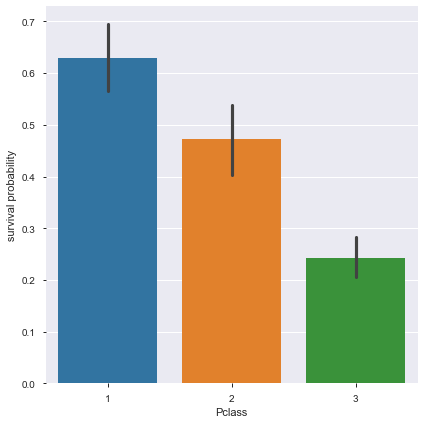

In [22]:
g = sns.catplot(x="Pclass", y="Survived", data=df_train, size=6, kind="bar")
g.set_ylabels("survival probability")

In [23]:
from sklearn.preprocessing import OneHotEncoder

1
2
3
3
2
1

  1 2 3
1:1 0 0
2:0 1 0
3:0 0 1
4:0 0 1
5:0 1 0
6:1 0 0
    

In [27]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

def get_sex_col(df):
    return df[['Sex']]

def get_pclass_col(df):
    return df[['Pclass']]

def get_num_cols(df):
    return df[['Age', 'Fare']]

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_pclass_col, validate=False),  OneHotEncoder(sparse=False)),
    make_pipeline(FunctionTransformer(get_sex_col, validate=False),  LabelEncoderPipelineFriendly()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), Imputer(strategy='mean'), FeaturesSum(), StandardScaler()),
    make_pipeline(FunctionTransformer(get_num_cols, validate=False), Imputer(strategy='mean'), MinMaxScaler()),
])

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
vec.fit_transform(df_train)

array([[ 0.        ,  0.        ,  1.        , ..., -0.62225381,
         0.27117366,  0.01415106],
       [ 1.        ,  0.        ,  0.        , ...,  0.90289025,
         0.4722292 ,  0.13913574],
       [ 0.        ,  0.        ,  1.        , ..., -0.53316528,
         0.32143755,  0.01546857],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.16682341,
         0.36792055,  0.04577135],
       [ 1.        ,  0.        ,  0.        , ..., -0.11249595,
         0.32143755,  0.0585561 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.42216194,
         0.39683338,  0.01512699]])

Какой способ лучше для представления Pclass?

# Выбросы

In [30]:
n_outliers = 3

x = 100 * np.random.rand(100, 1)
x_out = np.random.rand(n_outliers, 1) 
y = 100 + 2 * x + 10 * np.random.randn(100, 1)
y_out = 4 + 3 * x_out + 10 * np.random.randn(n_outliers, 1)
x = np.vstack([x, x_out])
y = np.vstack([y, y_out])
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.tail()

x      y
98  79.68 249.68
99  52.84 196.08
100  0.85  -0.54
101  0.06  -8.21
102  0.00  -5.32

Text(0, 0.5, 'y (target)')

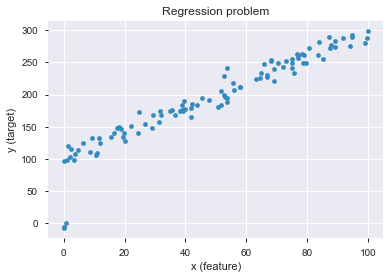

In [31]:
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

In [32]:
from sklearn.linear_model import LinearRegression

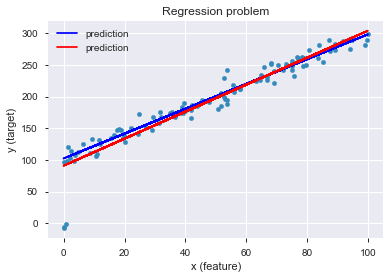

In [33]:
reg = LinearRegression()
reg.fit(x[:-n_outliers].reshape(-1, 1), y[:-n_outliers])
reg_out = LinearRegression()
reg_out.fit(x.reshape(-1, 1), y)
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x[:-n_outliers], reg.predict(x[:-n_outliers]), color='blue', label='prediction')
plt.plot(x, reg_out.predict(x), color='red', label='prediction')
plt.legend()

## Z-score

https://ru.wikipedia.org/wiki/Z-оценка

* Посчитать стандартное отклонение. 
* Провести стандартизацию (посчитать z-score каждой точки).
* Те точки, где z-score больше, чем N (например 3 (правило 3х сигм) соответствующее 0.13% данных) стандартных отклонений - выбросы

In [116]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

Family  Father  Mother Gender  Height  Kids
0      1   78.50   67.00      M   73.20     4
1      1   78.50   67.00      F   69.20     4
2      1   78.50   67.00      F   69.00     4
3      1   78.50   67.00      F   69.00     4
4      2   75.50   66.50      M   73.50     4

In [ ]:
scipy.stats.zscore()

In [193]:
def outliers_z_score(data, threshold):
    x = data.values
    mean_x = np.mean(x)
    print('mean:', mean_x)
    std_x = np.std(x)
    print('std:', std_x)
    print(threshold, '* std:', std_x * threshold)
    z_scores = [(xi - mean_x) / std_x for xi in x]
    
    outliers = x[np.where(np.abs(z_scores) > threshold)]
    
    print('outliers:', outliers)
    
    ax = data.plot.kde()
    ax.scatter(x, np.zeros(x.shape[0]))
    ax.scatter(outliers, np.zeros(outliers.shape[0]))
    
    for i in range(5):
        left, right = mean_x - i * std_x, mean_x + i * std_x
        ax.plot([right, right], [-.01,0.1], color='red', alpha=0.1)
        ax.plot([left, left], [-.01,0.1], color='red', alpha=0.1)
        
    left, right = mean_x - threshold * std_x, mean_x + threshold * std_x
    print('left, right thresholds:', left, right)
    ax.plot([right, right], [-.01,0.1], color='red', alpha=0.5)
    ax.plot([left, left], [-.01,0.1], color='red', alpha=0.5)

mean: 66.76069042316259
std: 3.5809229708094
3 * std: 10.7427689124282
outliers: [78. 79. 56.]
left, right thresholds: 56.01792151073438 77.50345933559079


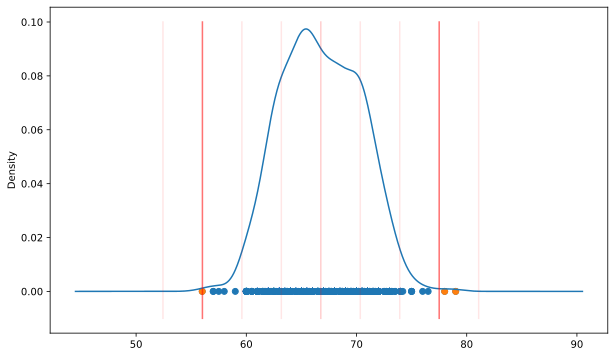

In [194]:
outliers_z_score(df['Height'], threshold=3)

## IQR (Interquartile range) method

* Рисуем ящик с усами
* коробка - 25 и 75 перцентили, то есть 1 и 3 квартили (первая и третья четверть данных)
* линия внутри коробки - медиана (середина данных, справа и слева от нее одинаковое количество наблюдений)
* считаем ширину коробки - IQR (interquartile range)
* умножаем IQR на 1.5
* все что на 1.5 * IQR дальше от коробки - выбросы

<AxesSubplot:>

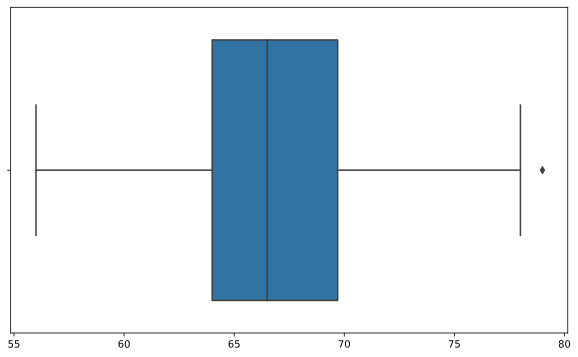

In [181]:
sns.boxplot(x=df['Height'].values)

## Оценка распределения

In [198]:
import scipy.stats as stats

def gaussian_estimate(data, threshold):
    
    x = data.values
    loc_param, scale_param = stats.norm.fit(x)
    print(loc_param, scale_param)
    
    xs = np.arange(55, 80, 0.1)
    param_density = stats.norm.pdf(xs, loc=loc_param, scale=scale_param)
    
    
    ax = data.plot.hist(bins=30, density=True)
    ax.plot(xs, param_density, color='red')
    #print(data)
    ax.plot(xs[np.where(param_density >= threshold)], param_density[np.where(param_density >= threshold)], color='black')
    
    points_new = stats.norm.pdf(x, loc=loc_param, scale=scale_param)
    ax.scatter(x, np.zeros(x.shape[0]) - 0.01, color='black', alpha=0.1)
    points_new_outliers = x[np.where(points_new < threshold)]
    ax.scatter(points_new_outliers, np.zeros(points_new_outliers.shape[0]) - 0.01, color='red')

In [199]:
import scipy.stats as stats

    
x = df['Height'].values
loc_param, scale_param = stats.norm.fit(x)
    
xs = np.arange(55, 80, 0.1)
param_density = stats.norm.pdf(xs, loc=loc_param, scale=scale_param)
    

66.76069042316259 3.5809229708094


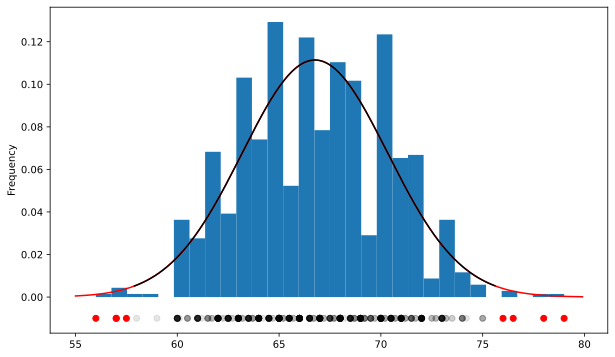

In [196]:
gaussian_estimate(df['Height'], threshold=0.005)

## Многомерные данные

<AxesSubplot:xlabel='Height', ylabel='Father'>

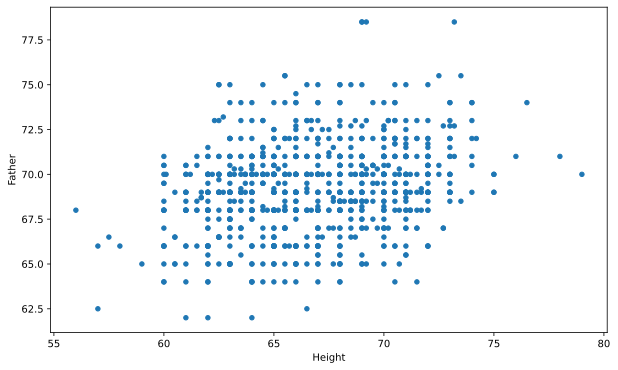

In [202]:
df[['Height', 'Father']].plot.scatter(x='Height', y='Father')

mu:  [66.76069042 69.23285078]
sigma:  [[12.83730476  2.43708989]
 [ 2.43708989  6.10216377]]
found outliers:  23


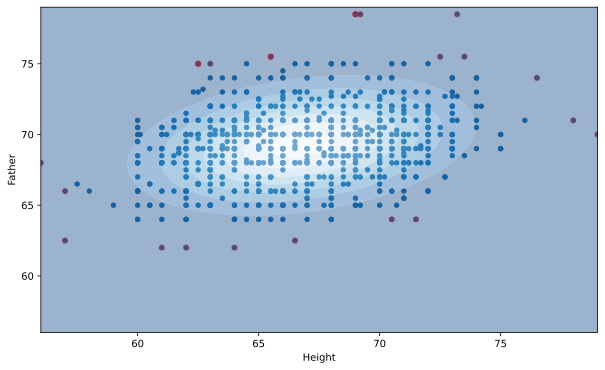

In [203]:
import scipy.stats as stats

def gaussian_estimate_dim(data, threshold):
    
    x = data.values
    
    mu = np.mean(x, axis=0)
    sigma = np.cov(x.T)
    
    print('mu: ', mu)
    print('sigma: ', sigma)
    
    p = stats.multivariate_normal(mean=mu, cov=sigma)
    ax = data.plot.scatter(x='Height', y='Father')
    
    x1, x2 = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(x.min(), x.max(), 100))
    z = p.pdf(np.c_[x1.ravel(), x2.ravel()])
    z = z.reshape(x1.shape)
    cont = ax.contourf(x1, x2, z, cmap=plt.cm.Blues_r, alpha=0.4)
            
    pdf = p.pdf(x)
    outliers = x[np.where(pdf < threshold)]
    ax.scatter(outliers[:, 0], outliers[:, 1], color='red', alpha=0.2)
    print('found outliers: ', outliers.shape[0])
    
    p = stats.multivariate_normal(mean=np.mean(x, axis=0), cov=np.cov(x.T))
    
gaussian_estimate_dim(df[['Height', 'Father']], threshold=0.0005)

# Другие виды признаков

## Дата и время
Добавить признаки периодичности данных:
* день недели
* день месяца
* месяц
* год
* час
* секунда
...

Признаки относительно событий:
* дней до зарплаты
* дней до праздников
* дней прошло с момента последней покупки
...



## Предметная область
* деньги - определить, цена округлена или присутствует \*.99
* наличие сезонности - фрукты (зима\лето)



## Гео данные

* средняя стоимость жилья в том же квартале
* расстояние до ближайшей поликлиники
* расстояние до воды
* расстояние до центра кластера среди объектов